# Chapter 3 - Data Preprocessing

Answer questions from the book [Applied Predictive Modeling](http://appliedpredictivemodeling.com/) Chapter 3

Dataset: 
glass.data [description](../data/glass.names)


In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/glass.data', header=None)

In [7]:
df.columns = ['id', 'refractive_index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass_type']

In [8]:
df.head()

,id,refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


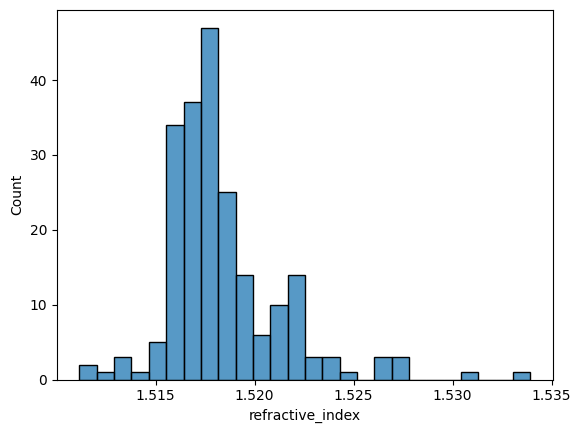

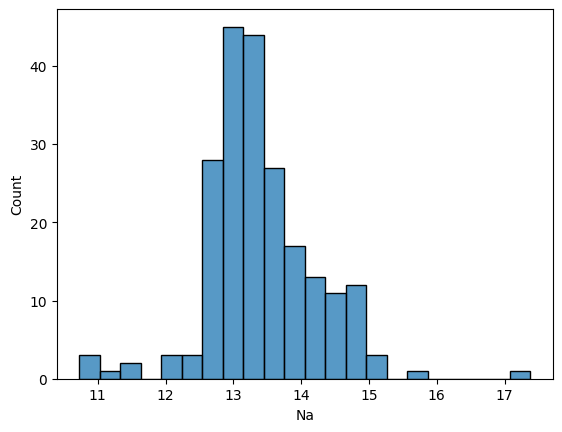

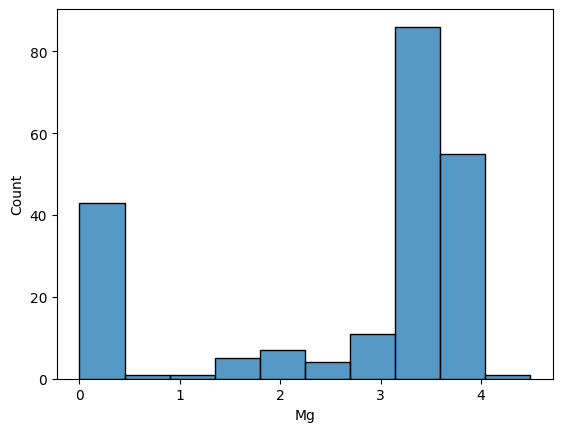

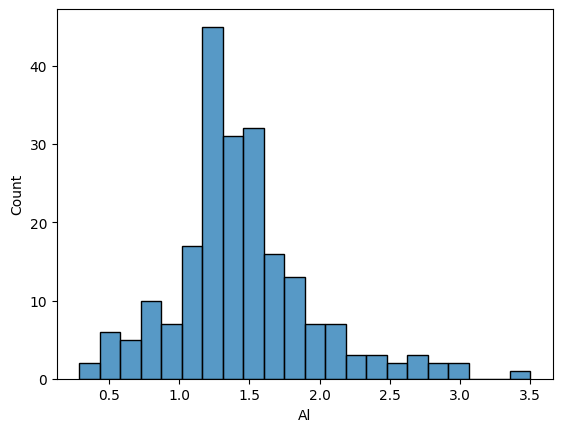

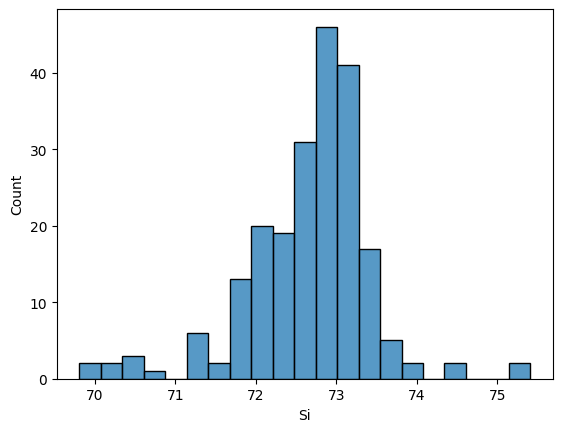

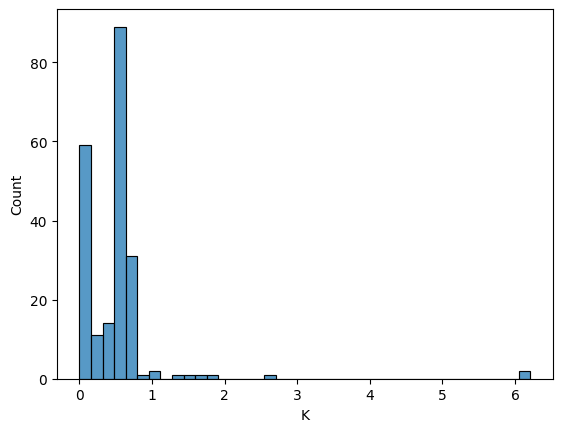

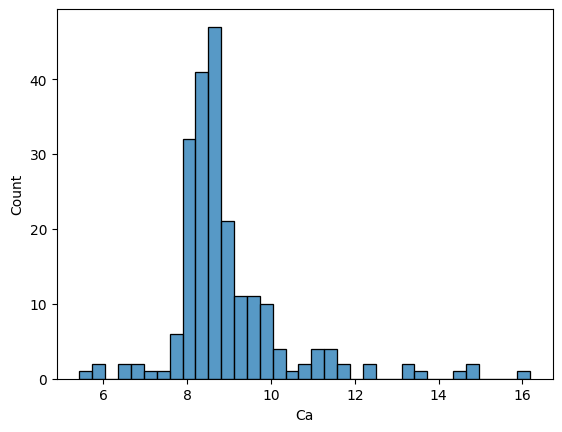

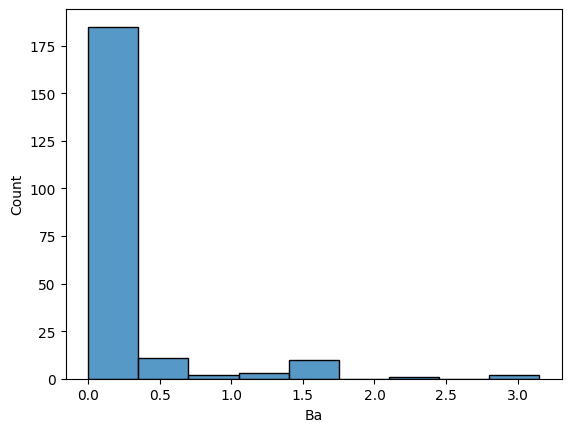

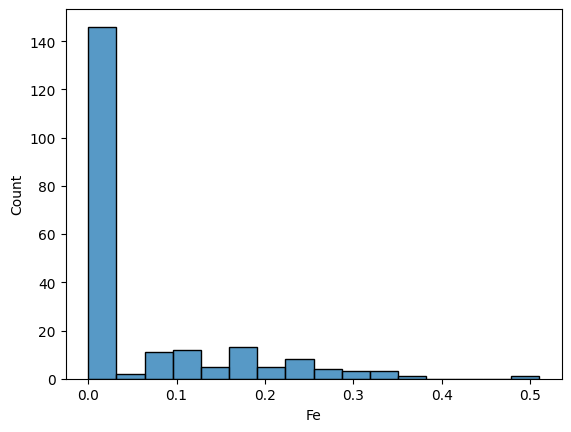

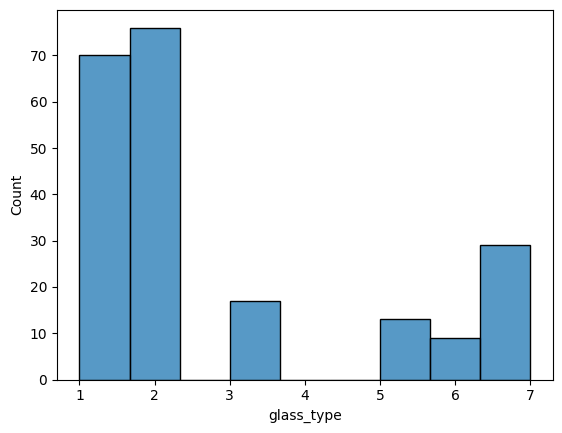

In [17]:
for col in df.columns[1:]:
    sns.histplot(data=df, x=col)
    plt.show()

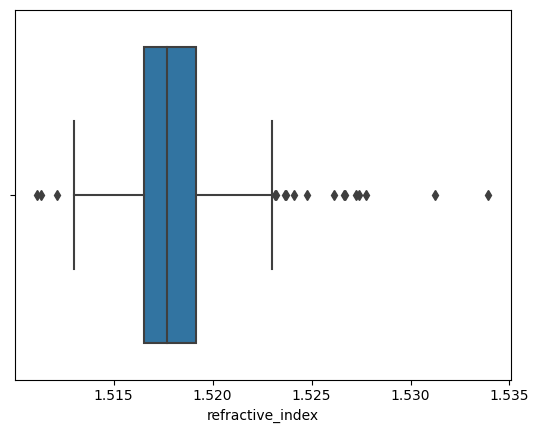

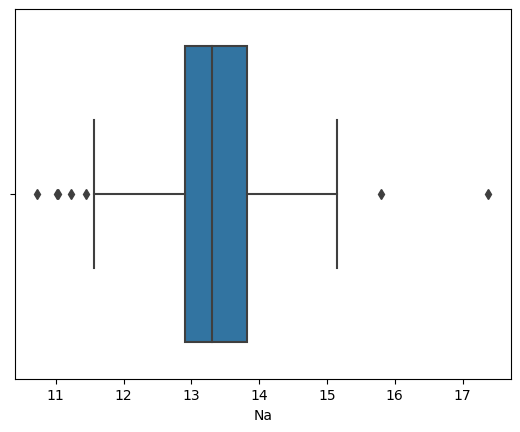

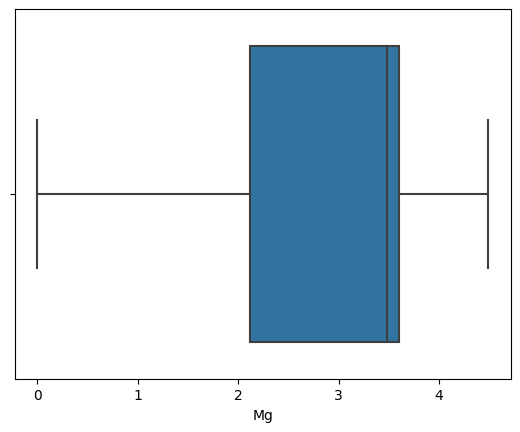

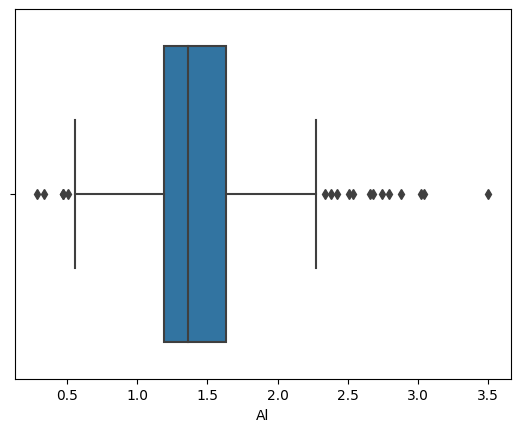

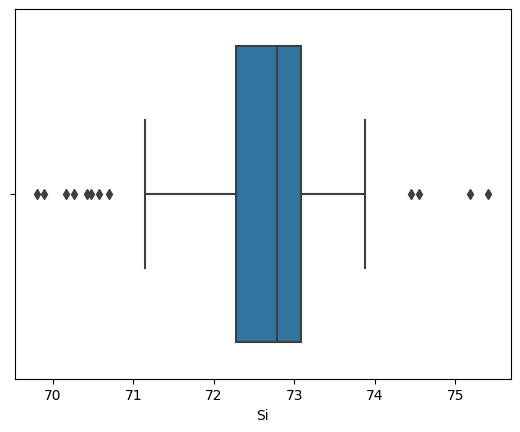

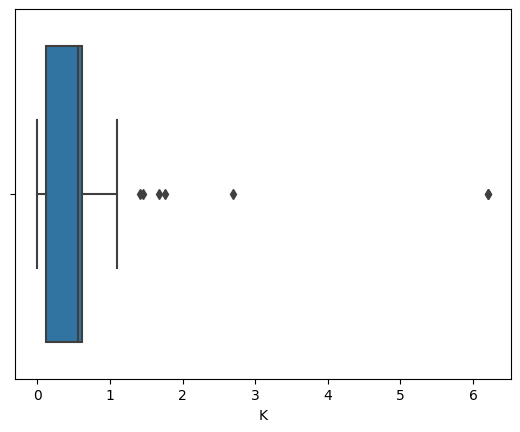

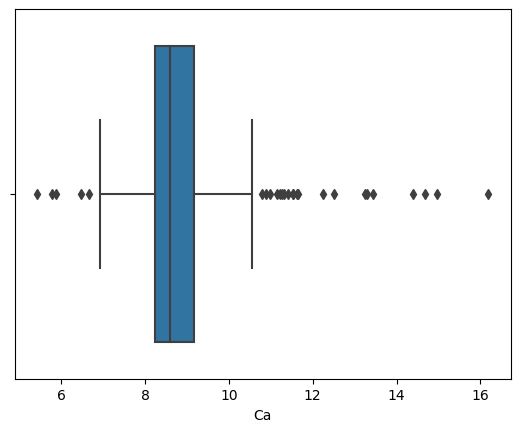

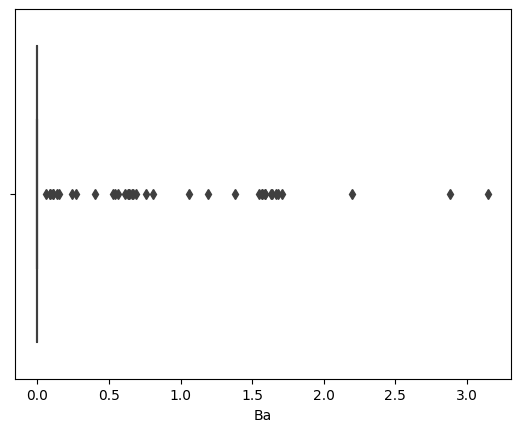

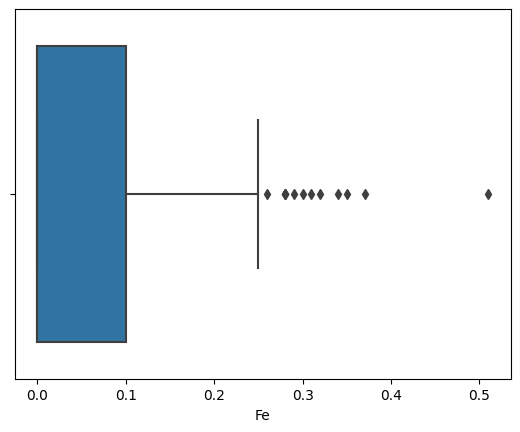

In [20]:
for col in df.columns[1:-1]:
    sns.boxplot(x=df[col])
    plt.show()
    